# Bike Sharing Assignment

`Problem statement`: A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state



In [1]:
import pandas as pd
import numpy as np


# Step - 1 : Reading and Understanding the Data¶

In [3]:
bike_data = pd.read_csv(r'C:\Users\pc\OneDrive\Desktop\pythonfilescase study\bike sharing asgnmnt\day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info() #check if there is any missing values and data type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Replacing the values of categorical variables like season,weathersit,mnth,weekday as per the data dictionary to b more specific about the feature category

bike_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_data.mnth = bike_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_data.weekday = bike_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike_data.describe() #check the details of numeriacl data

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


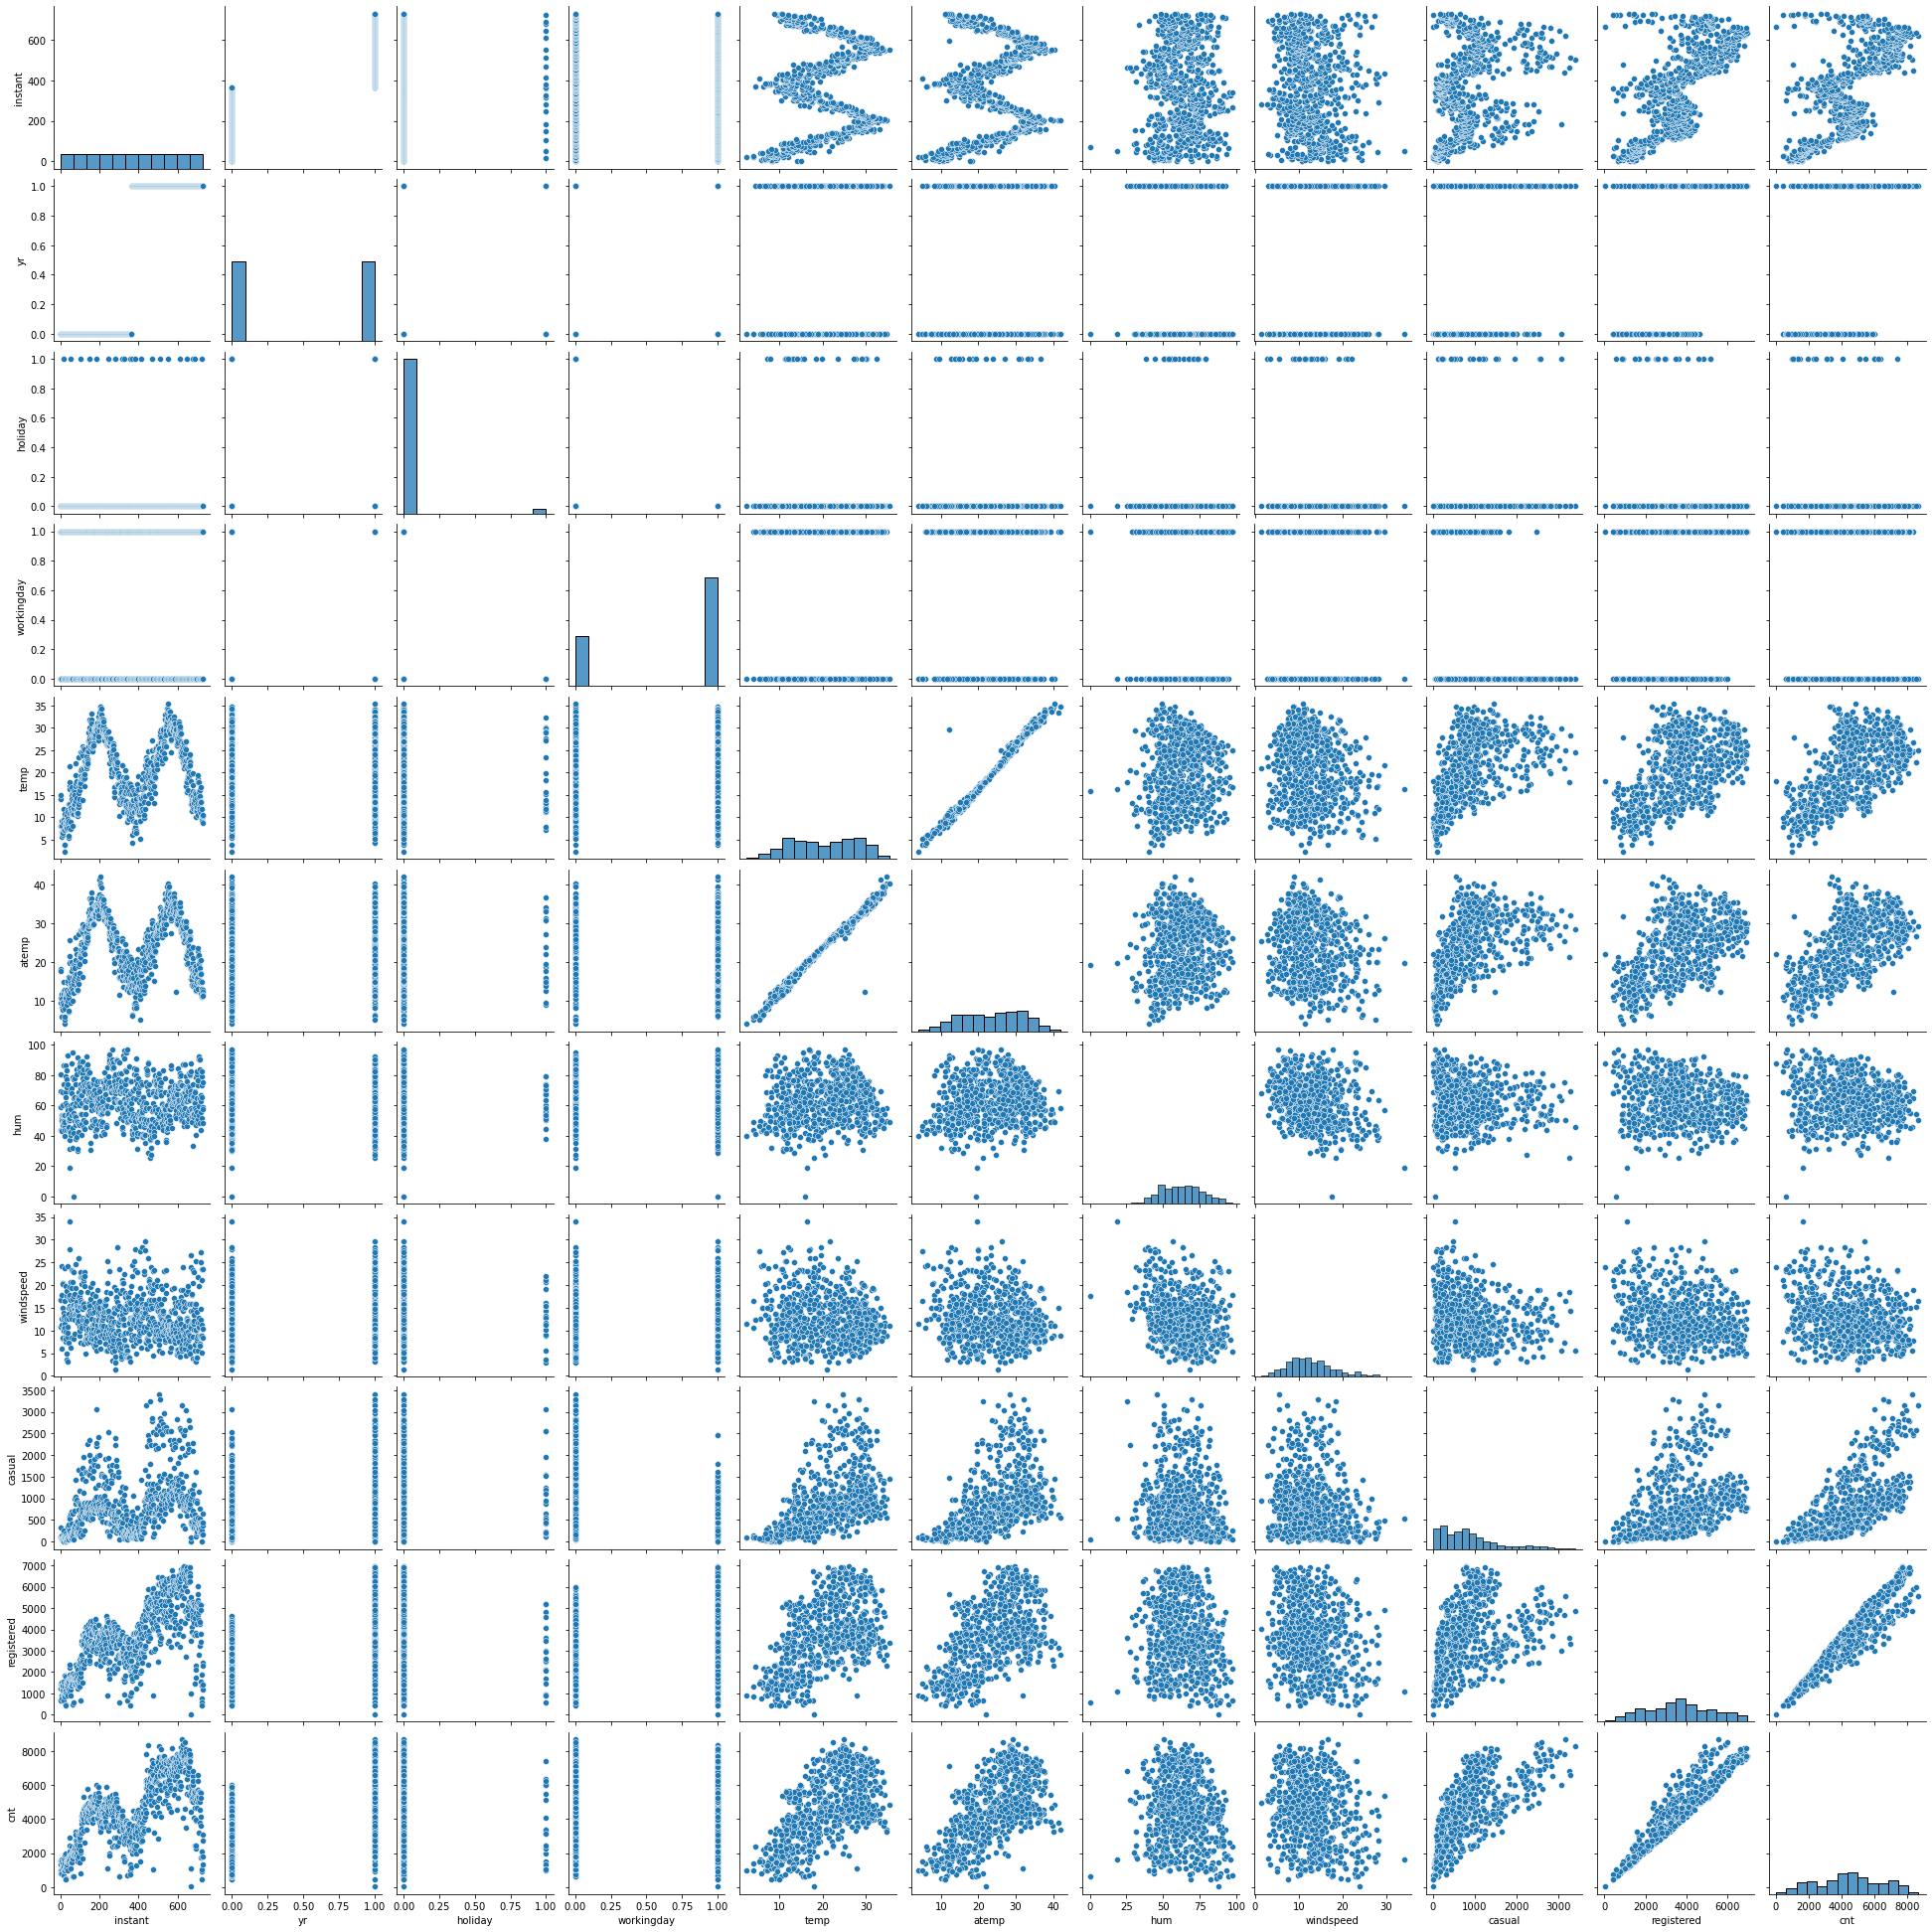

In [10]:
# visualizing the Numerical variables. 
import  matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(bike_data)
plt.show()

`Infernece`

- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other

As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.

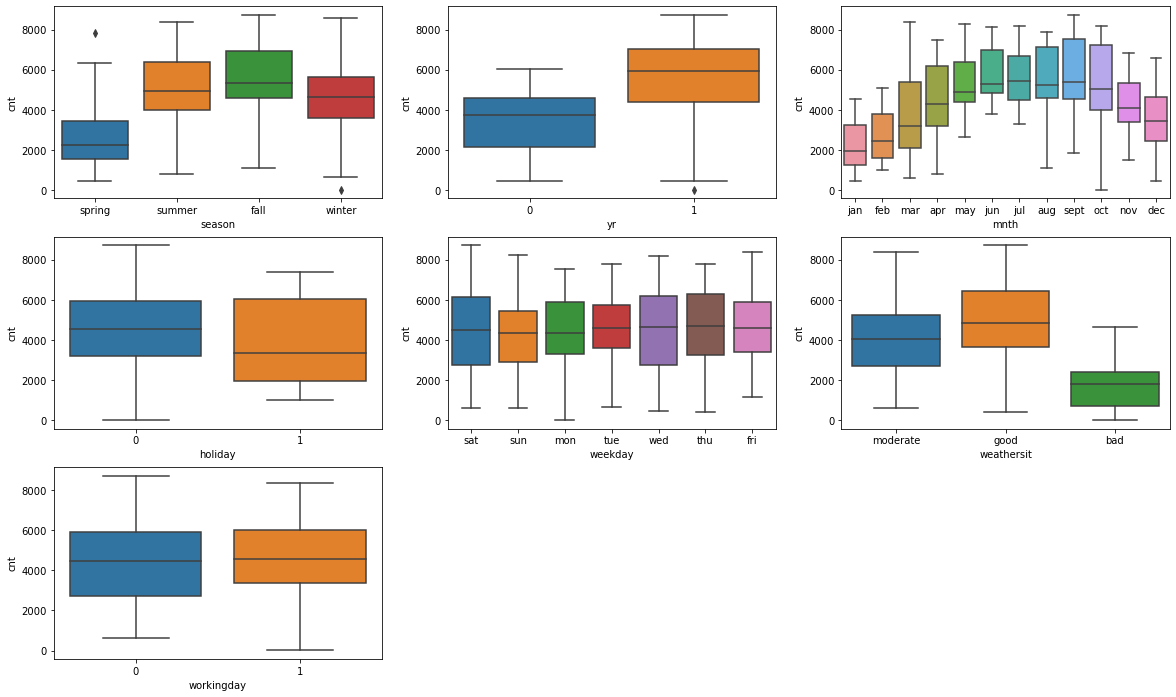

In [11]:
# visualizing the categorical variables. 
plt.figure(figsize= (20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y= 'cnt',data= bike_data)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y= 'cnt',data= bike_data)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y= 'cnt',data= bike_data)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y= 'cnt',data= bike_data)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y= 'cnt',data= bike_data)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y= 'cnt',data= bike_data)
plt.subplot(3,3,7)
sns.boxplot(x='workingday',y= 'cnt',data= bike_data)
plt.show()

# Data Cleaning
- Drop columns that are not useful for analysis
- instant is just a row instance identifier.
- dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [12]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bike_data['days_old'] = (pd.to_datetime(bike_data['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [15]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [16]:
# Dropping instant column 
bike_data = bike_data.drop('instant',axis=1)

In [17]:
# Dropping dteday column
bike_data = bike_data.drop('dteday',axis=1)

In [18]:
# Dropping casual column
bike_data = bike_data.drop('casual',axis=1)

In [19]:
# Dropping registered column
bike_data = bike_data.drop('registered',axis=1)

In [20]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [21]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [22]:
bike_data.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,-0.112667
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000,0.629896
days_old,0.866026,0.016275,-0.004619,0.150738,0.152773,0.016080,-0.112667,0.629896,1.000000


# Handling Missing values.
- As we have already seen there are no missing values. lets check again missing values(null values)

In [23]:
bike_data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

# Step 2 : Preparation of Data for modelling
 - Encodng

In [24]:
#Converting categorical variables to dummy variables.
bike_data = pd.get_dummies(data=bike_data,columns=["season","mnth","weekday"],drop_first=True)
bike_data = pd.get_dummies(data=bike_data,columns=["weathersit"])

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [25]:
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


In [27]:
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [28]:
bike_data.shape # checking shape of data before splitting

(730, 32)

In [29]:
# Splitting into train and test set
import sklearn
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(bike_data, train_size=0.7,random_state=100)
print(train_data.shape)
print(test_data.shape)

(510, 32)
(220, 32)


In [30]:
#Rescaling Features
# Min- max Scaling method
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [32]:
#Instantiate an object
scaler = MinMaxScaler()

# Fit on data
num_var = ['temp','atemp','hum','windspeed','cnt','days_old']
train_data[num_var]=scaler.fit_transform(train_data[num_var])
train_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.791209,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.585165,1,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,1,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.662088,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0.152473,0,...,0,0,0,0,0,0,0,0,0,1


# Training the Model

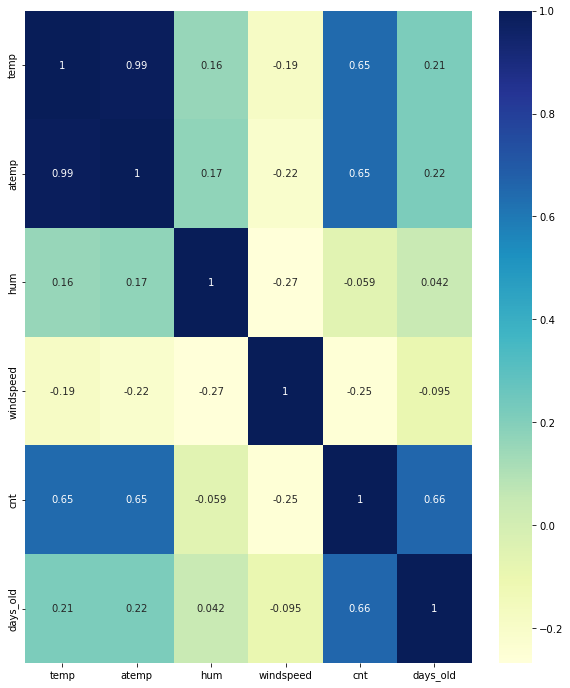

In [36]:
# Heatmap : To check the corelation b/w continuous variables variables 
plt.figure(figsize = (10,12))
sns.heatmap(train_data[num_var].corr(),annot = True, cmap="YlGnBu")
plt.show()

In [37]:
# Creating X_train and Y_train
y_train = train_data.pop('cnt')
X_train = train_data

In [38]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.152473,0,1,...,0,0,0,0,0,0,0,0,0,1


In [39]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

# Build a Model using RFE and Automated approach

Use RFE to eliminate some columns

In [41]:
# Build a Lienar Regression model using SKLearn for RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
#Cut down number of features to 15 using automated approach
from sklearn.feature_selection import RFE
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [44]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 4),
 ('season_spring', False, 6),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', False, 15),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', False, 10),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 17),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 16),
 ('mnth_oct', False, 3),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [45]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [46]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[~rfe.support_]

Index(['atemp', 'days_old', 'season_spring', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

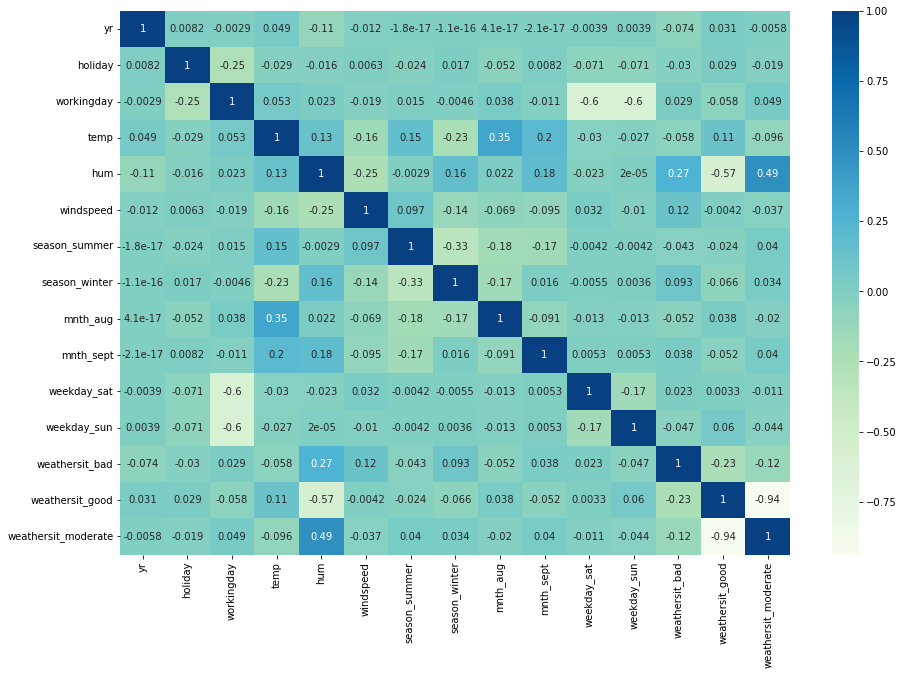

In [107]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike_data[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

## Function to build a model using statsmodel 

In [47]:
col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']
import statsmodels.api as  sm

# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [48]:
lr_model.params

const                  0.062056
yr                     0.228924
holiday               -0.051563
workingday             0.049364
temp                   0.539576
hum                   -0.166423
windspeed             -0.182549
season_summer          0.103120
season_winter          0.147566
mnth_aug               0.052340
mnth_sept              0.119554
weekday_sat            0.058040
weekday_sun            0.006214
weathersit_bad        -0.121687
weathersit_good        0.120062
weathersit_moderate    0.063681
dtype: float64

In [49]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.6
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          6.92e-192
Time:                        14:51:19   Log-Likelihood:                 515.97
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -944.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0621      0.021      3.025      0.003       0.022       0.102
yr                      0.2289      0.008     28.563      0.000       0.213       0.245
holiday                -0.0516      0.021     -2.507      0.013      -0.092      -0.011
workingday              0.0494      0.009      5.677      0.000       0.032       0.066
temp                    0.5396      0.022     24.834      0.000       0.497       0.582
hum                    -0.1664      0.037     -4.490      0.000      -0.239      -0.094
windspeed              -0.1825      0.025     -7.208      0.000      -0.232      -0.133
season_summer           0.1031      0.011      9.599      0.000       0.082       0.124
season_winter           0.1476      0.011     14.023      0.000       0.127       0.168
mnth_aug                0.0523      0.016      3.249      0.001       0.021       0.084
mnth_sept               0.1196      0.016      7.470      0.000       0.088       0.151
weekday_sat             0.0580      0.011      5.379      0.000       0.037       0.079
weekday_sun             0.0062      0.012      0.540      0.589      -0.016       0.029
weathersit_bad         -0.1217      0.021     -5.857      0.000      -0.163      -0.081
weathersit_good         0.1201      0.008     14.897      0.000       0.104       0.136
weathersit_moderate     0.0637      0.010      6.088      0.000       0.043       0.084
==============================================================================
Omnibus:                       61.945   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.555
Skew:                          -0.647   Prob(JB):                     4.08e-32
Kurtosis:                       5.265   Cond. No.                     4.90e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.98e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
10,weekday_sat,inf
11,weekday_sun,inf
12,weathersit_bad,inf
13,weathersit_good,inf
14,weathersit_moderate,inf
4,hum,1.87
3,temp,1.54
8,mnth_aug,1.44


# Model 2 
- drop weekday_sun col has high insifnificant

In [54]:
col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sat','weathersit_bad', 'weathersit_good',
       'weathersit_moderate']
import statsmodels.api as  sm

# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [55]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.6
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          6.92e-192
Time:                        15:23:22   Log-Likelihood:                 515.97
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -944.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0667      0.025      2.625      0.009       0.017       0.117
yr                      0.2289      0.008     28.563      0.000       0.213       0.245
holiday                -0.0578      0.027     -2.140      0.033      -0.111      -0.005
workingday              0.0431      0.012      3.727      0.000       0.020       0.066
temp                    0.5396      0.022     24.834      0.000       0.497       0.582
hum                    -0.1664      0.037     -4.490      0.000      -0.239      -0.094
windspeed              -0.1825      0.025     -7.208      0.000      -0.232      -0.133
season_summer           0.1031      0.011      9.599      0.000       0.082       0.124
season_winter           0.1476      0.011     14.023      0.000       0.127       0.168
mnth_aug                0.0523      0.016      3.249      0.001       0.021       0.084
mnth_sept               0.1196      0.016      7.470      0.000       0.088       0.151
weekday_sat             0.0518      0.015      3.554      0.000       0.023       0.080
weathersit_bad         -0.1201      0.022     -5.485      0.000      -0.163      -0.077
weathersit_good         0.1216      0.008     14.413      0.000       0.105       0.138
weathersit_moderate     0.0652      0.011      5.714      0.000       0.043       0.088
==============================================================================
Omnibus:                       61.945   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.555
Skew:                          -0.647   Prob(JB):                     4.08e-32
Kurtosis:                       5.265   Cond. No.                     1.23e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
12,weathersit_good,33.11
13,weathersit_moderate,24.98
11,weathersit_bad,3.69
2,workingday,1.88
4,hum,1.87
10,weekday_sat,1.78
3,temp,1.54
8,mnth_aug,1.44
6,season_summer,1.38
7,season_winter,1.32


# Model 3
- drop weathersit_good col has high VIF

In [57]:
col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sat','weathersit_bad','weathersit_moderate']

# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [58]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.6
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          6.92e-192
Time:                        15:31:56   Log-Likelihood:                 515.97
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -944.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1883      0.029      6.553      0.000       0.132       0.245
yr                      0.2289      0.008     28.563      0.000       0.213       0.245
holiday                -0.0578      0.027     -2.140      0.033      -0.111      -0.005
workingday              0.0431      0.012      3.727      0.000       0.020       0.066
temp                    0.5396      0.022     24.834      0.000       0.497       0.582
hum                    -0.1664      0.037     -4.490      0.000      -0.239      -0.094
windspeed              -0.1825      0.025     -7.208      0.000      -0.232      -0.133
season_summer           0.1031      0.011      9.599      0.000       0.082       0.124
season_winter           0.1476      0.011     14.023      0.000       0.127       0.168
mnth_aug                0.0523      0.016      3.249      0.001       0.021       0.084
mnth_sept               0.1196      0.016      7.470      0.000       0.088       0.151
weekday_sat             0.0518      0.015      3.554      0.000       0.023       0.080
weathersit_bad         -0.2417      0.026     -9.284      0.000      -0.293      -0.191
weathersit_moderate    -0.0564      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       61.945   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.555
Skew:                          -0.647   Prob(JB):                     4.08e-32
Kurtosis:                       5.265   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,hum,16.54
3,temp,9.76
2,workingday,5.02
5,windspeed,3.83
12,weathersit_moderate,2.13
0,yr,2.02
10,weekday_sat,1.90
6,season_summer,1.83
7,season_winter,1.75
8,mnth_aug,1.59


# Model 4
- drop hum col has negative cofficient and high VIF

In [60]:
col = ['yr', 'holiday', 'workingday', 'temp','windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sat','weathersit_bad','weathersit_moderate']

# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [61]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          8.64e-189
Time:                        15:38:48   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0903      0.019      4.740      0.000       0.053       0.128
yr                      0.2327      0.008     28.651      0.000       0.217       0.249
holiday                -0.0560      0.028     -2.036      0.042      -0.110      -0.002
workingday              0.0463      0.012      3.933      0.000       0.023       0.069
temp                    0.5188      0.022     23.980      0.000       0.476       0.561
windspeed              -0.1508      0.025     -6.085      0.000      -0.200      -0.102
season_summer           0.1004      0.011      9.183      0.000       0.079       0.122
season_winter           0.1382      0.011     13.148      0.000       0.118       0.159
mnth_aug                0.0510      0.016      3.104      0.002       0.019       0.083
mnth_sept               0.1136      0.016      6.991      0.000       0.082       0.146
weekday_sat             0.0569      0.015      3.842      0.000       0.028       0.086
weathersit_bad         -0.2872      0.024    -11.749      0.000      -0.335      -0.239
weathersit_moderate    -0.0830      0.009     -9.555      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_summer,1.82
9,weekday_sat,1.76
7,mnth_aug,1.58
11,weathersit_moderate,1.54
6,season_winter,1.52
8,mnth_sept,1.31


# Model 5
- drop holiday col has negative cofficient and high P value

In [64]:
col = ['yr','workingday', 'temp','windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sat','weathersit_bad','weathersit_moderate']

# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [65]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          4.31e-189
Time:                        15:43:41   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0809      0.019      4.365      0.000       0.045       0.117
yr                      0.2328      0.008     28.578      0.000       0.217       0.249
workingday              0.0546      0.011      4.926      0.000       0.033       0.076
temp                    0.5208      0.022     24.022      0.000       0.478       0.563
windspeed              -0.1518      0.025     -6.105      0.000      -0.201      -0.103
season_summer           0.1010      0.011      9.220      0.000       0.080       0.123
season_winter           0.1379      0.011     13.083      0.000       0.117       0.159
mnth_aug                0.0512      0.016      3.111      0.002       0.019       0.084
mnth_sept               0.1117      0.016      6.864      0.000       0.080       0.144
weekday_sat             0.0653      0.014      4.576      0.000       0.037       0.093
weathersit_bad         -0.2860      0.025    -11.664      0.000      -0.334      -0.238
weathersit_moderate    -0.0826      0.009     -9.474      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,season_summer,1.82
8,weekday_sat,1.69
6,mnth_aug,1.58
10,weathersit_moderate,1.54
5,season_winter,1.51
7,mnth_sept,1.30


# Model 6
- drop temp col has high VIF

In [67]:
col = ['yr','workingday','windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sat','weathersit_bad','weathersit_moderate']

# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [68]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     93.15
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          2.31e-107
Time:                        15:49:44   Log-Likelihood:                 307.46
No. Observations:                 510   AIC:                            -592.9
Df Residuals:                     499   BIC:                            -546.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3546      0.021     16.505      0.000       0.312       0.397
yr                      0.2504      0.012     21.027      0.000       0.227       0.274
workingday              0.0585      0.016      3.596      0.000       0.027       0.090
windspeed              -0.2502      0.036     -6.953      0.000      -0.321      -0.180
season_summer           0.1682      0.016     10.814      0.000       0.138       0.199
season_winter           0.1175      0.015      7.616      0.000       0.087       0.148
mnth_aug                0.2216      0.022     10.160      0.000       0.179       0.264
mnth_sept               0.2310      0.023     10.152      0.000       0.186       0.276
weekday_sat             0.0596      0.021      2.844      0.005       0.018       0.101
weathersit_bad         -0.2857      0.036     -7.940      0.000      -0.356      -0.215
weathersit_moderate    -0.1124      0.013     -8.876      0.000      -0.137      -0.088
==============================================================================
Omnibus:                        2.960   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                3.206
Skew:                           0.046   Prob(JB):                        0.201
Kurtosis:                       3.377   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,workingday,3.33
2,windspeed,3.25
0,yr,1.90
3,season_summer,1.61
7,weekday_sat,1.56
9,weathersit_moderate,1.54
4,season_winter,1.47
5,mnth_aug,1.23
6,mnth_sept,1.14
8,weathersit_bad,1.08


# Model 7
 - adding temp variable agan and now check the model situation as As we have seen in model after remove temp variable r2 value suddenly falls to 60s from 80s. let know manually handle variables and add temp variable again.

In [108]:
col = ['yr','workingday','windspeed','temp','season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sat','weathersit_bad','weathersit_moderate']

# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [111]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          4.31e-189
Time:                        14:15:26   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0809      0.019      4.365      0.000       0.045       0.117
yr                      0.2328      0.008     28.578      0.000       0.217       0.249
workingday              0.0546      0.011      4.926      0.000       0.033       0.076
windspeed              -0.1518      0.025     -6.105      0.000      -0.201      -0.103
temp                    0.5208      0.022     24.022      0.000       0.478       0.563
season_summer           0.1010      0.011      9.220      0.000       0.080       0.123
season_winter           0.1379      0.011     13.083      0.000       0.117       0.159
mnth_aug                0.0512      0.016      3.111      0.002       0.019       0.084
mnth_sept               0.1117      0.016      6.864      0.000       0.080       0.144
weekday_sat             0.0653      0.014      4.576      0.000       0.037       0.093
weathersit_bad         -0.2860      0.025    -11.664      0.000      -0.334      -0.238
weathersit_moderate    -0.0826      0.009     -9.474      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,temp,6.10
1,workingday,4.04
2,windspeed,3.49
0,yr,2.02
4,season_summer,1.82
8,weekday_sat,1.69
6,mnth_aug,1.58
10,weathersit_moderate,1.54
5,season_winter,1.51
7,mnth_sept,1.30


# Model 8
 - Removing workingday as it is highly correlated with temperature and cheking behavior of model instead of removing temp which has got high VIF

In [116]:
col = ['yr','season_summer','windspeed','temp', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sat','weathersit_bad','weathersit_moderate']

# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [117]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.6
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          3.60e-185
Time:                        14:22:59   Log-Likelihood:                 491.56
No. Observations:                 510   AIC:                            -961.1
Df Residuals:                     499   BIC:                            -914.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1225      0.017      7.253      0.000       0.089       0.156
yr                      0.2333      0.008     27.993      0.000       0.217       0.250
season_summer           0.1030      0.011      9.191      0.000       0.081       0.125
windspeed              -0.1537      0.025     -6.045      0.000      -0.204      -0.104
temp                    0.5224      0.022     23.554      0.000       0.479       0.566
season_winter           0.1359      0.011     12.604      0.000       0.115       0.157
mnth_aug                0.0548      0.017      3.255      0.001       0.022       0.088
mnth_sept               0.1132      0.017      6.798      0.000       0.080       0.146
weekday_sat             0.0217      0.011      1.894      0.059      -0.001       0.044
weathersit_bad         -0.2783      0.025    -11.117      0.000      -0.327      -0.229
weathersit_moderate    -0.0797      0.009     -8.954      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       70.106   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.055
Skew:                          -0.747   Prob(JB):                     3.53e-34
Kurtosis:                       5.240   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,temp,5.03
2,windspeed,3.14
0,yr,2.00
1,season_summer,1.81
5,mnth_aug,1.58
9,weathersit_moderate,1.49
4,season_winter,1.48
6,mnth_sept,1.30
7,weekday_sat,1.18
8,weathersit_bad,1.08


# Model 9
- Removing variale weekday_sat as it got high p value and replacing with variable weekday_Sunday which was dropped during RFE instead of Saturday.

In [119]:
col = ['yr','season_summer','windspeed','temp', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sun','weathersit_bad','weathersit_moderate']

# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [120]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.1
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          1.59e-187
Time:                        14:30:49   Log-Likelihood:                 497.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     499   BIC:                            -925.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1330      0.017      7.958      0.000       0.100       0.166
yr                      0.2328      0.008     28.248      0.000       0.217       0.249
season_summer           0.1021      0.011      9.211      0.000       0.080       0.124
windspeed              -0.1517      0.025     -6.037      0.000      -0.201      -0.102
temp                    0.5220      0.022     23.806      0.000       0.479       0.565
season_winter           0.1373      0.011     12.873      0.000       0.116       0.158
mnth_aug                0.0531      0.017      3.188      0.002       0.020       0.086
mnth_sept               0.1108      0.016      6.722      0.000       0.078       0.143
weekday_sun            -0.0449      0.012     -3.829      0.000      -0.068      -0.022
weathersit_bad         -0.2822      0.025    -11.386      0.000      -0.331      -0.234
weathersit_moderate    -0.0813      0.009     -9.222      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       69.178   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.304
Skew:                          -0.688   Prob(JB):                     5.20e-39
Kurtosis:                       5.530   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,temp,5.09
2,windspeed,3.10
0,yr,2.00
1,season_summer,1.81
5,mnth_aug,1.58
4,season_winter,1.49
9,weathersit_moderate,1.49
6,mnth_sept,1.31
7,weekday_sun,1.16
8,weathersit_bad,1.08


# Model 10
 - Removing windspeed with spring as windspeed was highly correlated with temp

In [129]:
col = ['yr','season_summer','temp', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sun','weathersit_bad','weathersit_moderate']

# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [130]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.7
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          3.96e-181
Time:                        14:43:52   Log-Likelihood:                 479.14
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     500   BIC:                            -895.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0711      0.014      5.204      0.000       0.044       0.098
yr                      0.2316      0.009     27.160      0.000       0.215       0.248
season_summer           0.0977      0.011      8.534      0.000       0.075       0.120
temp                    0.5441      0.022     24.319      0.000       0.500       0.588
season_winter           0.1452      0.011     13.256      0.000       0.124       0.167
mnth_aug                0.0575      0.017      3.339      0.001       0.024       0.091
mnth_sept               0.1183      0.017      6.952      0.000       0.085       0.152
weekday_sun            -0.0448      0.012     -3.690      0.000      -0.069      -0.021
weathersit_bad         -0.2968      0.026    -11.626      0.000      -0.347      -0.247
weathersit_moderate    -0.0796      0.009     -8.733      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       70.057   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.732
Skew:                          -0.697   Prob(JB):                     1.54e-39
Kurtosis:                       5.544   Cond. No.                         8.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,4.04
0,yr,1.94
1,season_summer,1.79
4,mnth_aug,1.56
3,season_winter,1.47
8,weathersit_moderate,1.45
5,mnth_sept,1.29
6,weekday_sun,1.16
7,weathersit_bad,1.06


# Model 11
- drop mnth_august as is has high corelation with temp 

In [141]:
col = ['yr','season_summer','temp', 'season_winter','mnth_sept',
       'weekday_sun','weathersit_bad','weathersit_moderate']

# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [142]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     281.7
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          5.57e-180
Time:                        14:58:41   Log-Likelihood:                 473.52
No. Observations:                 510   AIC:                            -929.0
Df Residuals:                     501   BIC:                            -890.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0645      0.014      4.729      0.000       0.038       0.091
yr                      0.2318      0.009     26.924      0.000       0.215       0.249
season_summer           0.0836      0.011      7.779      0.000       0.063       0.105
temp                    0.5774      0.020     28.535      0.000       0.538       0.617
season_winter           0.1372      0.011     12.708      0.000       0.116       0.158
mnth_sept               0.1022      0.016      6.202      0.000       0.070       0.135
weekday_sun            -0.0464      0.012     -3.790      0.000      -0.070      -0.022
weathersit_bad         -0.2983      0.026    -11.571      0.000      -0.349      -0.248
weathersit_moderate    -0.0766      0.009     -8.365      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       68.507   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.370
Skew:                          -0.719   Prob(JB):                     1.11e-34
Kurtosis:                       5.301   Cond. No.                         8.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,2.94
0,yr,1.94
1,season_summer,1.52
7,weathersit_moderate,1.44
3,season_winter,1.34
4,mnth_sept,1.19
5,weekday_sun,1.15
6,weathersit_bad,1.06


# Model Evaluation
- Residual Analysis

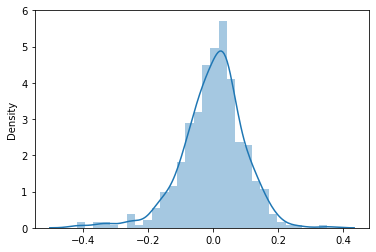

In [144]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

Errors are normally distribured here with mean 0. So everything seems to be fine

### Linearity check

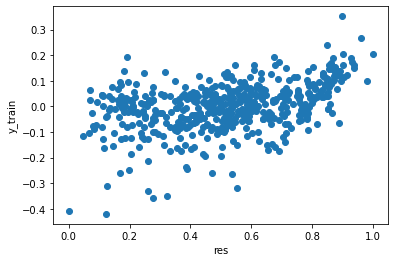

In [145]:
# scatter plot for the check

plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("res")
plt.show()

# Prediction on Test set

In [146]:
test_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.252747,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.734890,0,1,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.410714,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.303571,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.208791,0,1,...,0,0,0,0,1,0,0,0,1,0


In [73]:
test_data.shape

(220, 32)

In [ ]:
num_var = ['temp','atemp','hum','windspeed','cnt','days_old']
test_data[num_var]=scaler.transform(test_data[num_var])
test_data.head()

In [75]:
test_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.490559,0.254545,...,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.294116,0.436599,...,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.004121,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.234203,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.480082,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.740041,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.001374,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
# Creating X_test and Y_test
Y_test = test_data.pop('cnt')
X_test = test_data

In [78]:
Y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [79]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.252747,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.734890,0,1,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.410714,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.303571,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.208791,0,1,...,0,0,0,0,1,0,0,0,1,0


In [148]:
#Columns from our final model

col = ['yr','season_summer','temp', 'season_winter','mnth_sept',
       'weekday_sun','weathersit_bad','weathersit_moderate']

X_test_check = X_test[col]

# add aconstant to X_test_check
X_test_check = sm.add_constant(X_test[col])

In [149]:
#Predict
y_test_pred = lr_model.predict(X_test_check)

In [150]:
# Evaluate
from sklearn.metrics import r2_score
r2score =r2_score(y_true=Y_test, y_pred=y_test_pred)
print(r2score)

0.797368993270902


# Homoscedacity

`Inference`
- R2 value for predictions on test data (0.797) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

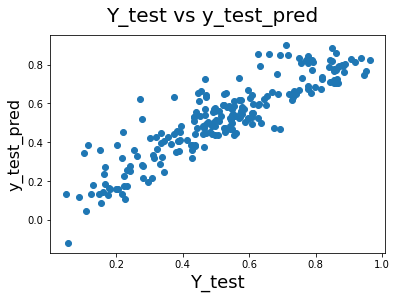

In [154]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, y_test_pred)
fig.suptitle('Y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('Y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

`Inference`
- We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

 # Interepretation 

- Company should focus on expanding business during winter.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.

Hence when the situation comes back to normal, the company should come up with new offers during winter when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

`Conclusion`

Significant variables to predict the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)